## Importation des libraries:

In [149]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path="./Live.csv"
# Importing the dataset
dataset = pd.read_csv(path)
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


##  Pretraitement de donnees: 
     -  ici on va supprimer les colonnes non numerique pour rendre k means clustering applicable sur le dataset

In [54]:
dataset.drop(['status_published',,'Column1','Column2','Column3','Column4','status_id','status_type'], axis=1, inplace=True)
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


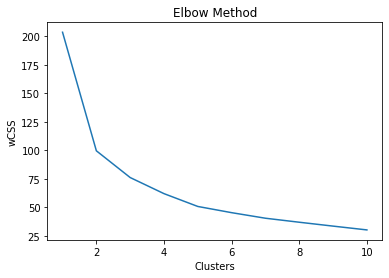

" pour dessiner et choisir le coude qui va etre le nombre de clusters (classes) et cela avec la methode de \nelbow ainsi le calcule de l'inertie wCSS"

In [88]:
#Elbow method to optimize number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
X= pd.DataFrame(dataset, columns=["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"])
ms = MinMaxScaler()
X = ms.fit_transform(X)
wCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
    kmeans.fit(X)
    wCSS.append(kmeans.inertia_)
plt.plot(range(1,11), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

""" pour dessiner et choisir le coude qui va etre le nombre de clusters (classes) et cela avec la methode de 
elbow ainsi le calcule de l'inertie wCSS"""

In [105]:
"""le tableau de données normalisé"""
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [112]:
from sklearn.preprocessing import LabelEncoder
codage = LabelEncoder()
dataset['status_type'] = codage.fit_transform(dataset['status_type'])
# y = codage.transform(y)
# y
y=dataset['status_type'] 
y  #la vraie classe

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

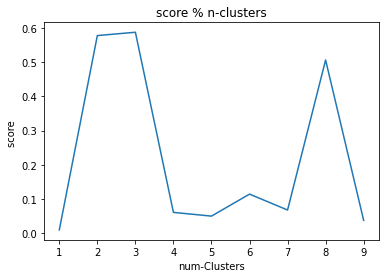

In [129]:
scores=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
    y_kmeans=kmeans.fit_predict(X)
    correct_labels = sum(y == kmeans.labels_)
    scores.append(correct_labels/len(kmeans.labels_))
plt.plot(range(1,10), scores)
plt.title('score % n-clusters')
plt.xlabel('num-Clusters')
plt.ylabel('score ')
plt.show()    

In [135]:
#Applying KMeans to data with the best n_clusters (in our case =2)
# pour afficher les centres: 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
y_kmeans=kmeans.fit_predict(X)


In [148]:
print("les centres de k means sont donnés par : \n",kmeans.cluster_centers_)

les centres de k means sont donnés par : 
 [[2.19286388e-01 1.64379599e-01 1.74805296e-01 1.69190847e-01
  3.00076104e-01 8.72102318e-02 6.79759377e-02 4.48801743e-02
  5.07168459e-02]
 [2.47528065e-02 6.87617299e-03 7.59103089e-03 2.27384680e-02
  1.24370313e-02 2.11465177e-03 2.85830231e-03 3.89260044e-03
  2.54668930e-03]
 [3.87439787e-01 2.91856849e-03 4.34080118e-03 3.86212132e-01
  4.72169032e-03 8.76073335e-03 1.24991439e-03 8.43348092e-04
  1.73430454e-04]]


In [133]:
# pour afficher les etiquettes :
print("labels are :", kmeans.labels_)

labels are : [1 1 1 ... 1 1 1]


In [132]:
# pour afficher l'inertie de modele : 
print("l'inertie obtenue est ",kmeans.inertia_)

l'inertie obtenue est  76.02049833449264


In [131]:
correct_labels = sum(y == kmeans.labels_)
print("l'accuracy obtenu est ",correct_labels/len(kmeans.labels_))

l'accuracy obtenu est  0.5879432624113475


In [82]:
#Visualizing clusters
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100, c='blue', label = 'C1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=100, c='red', label = 'C2')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='black', label = 'Centroid')
# plt.title('Clusters of Classes')
# plt.xlabel('classes')
# plt.ylabel('Score')
# plt.legend()
# plt.show()